https://finance.yahoo.com/quote/VFS/history/

In [ ]:
!pip install yfinance

import yfinance as yf
import datetime


In [ ]:
ticker = "VFS"

start_date = "2022-10-1"
end_date = datetime.date.today()


In [ ]:
try:
    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print(f"No data found for {ticker} within the selected date range.")
    else:
        print(f"Successfully downloaded data for {ticker} from {start_date} to {end_date.strftime('%Y-%m-%d')}.")

        print("\n--- FIRST 5 ROWS (Initial Data) ---")
        print(data.head())

        print("\n--- LAST 5 ROWS (Most Recent Data) ---")
        print(data.tail())

except Exception as e:
    print(f"An error occurred: {e}")


/tmp/ipython-input-2015041606.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Successfully downloaded data for VFS from 2022-10-1 to 2025-11-09.

--- FIRST 5 ROWS (Initial Data) ---
Price      Close  High   Low  Open Volume
Ticker       VFS   VFS   VFS   VFS    VFS
Date                                     
2022-10-03  9.79  9.79  9.79  9.79   1600
2022-10-04  9.79  9.79  9.79  9.79      0
2022-10-05  9.79  9.79  9.79  9.79      0
2022-10-06  9.79  9.79  9.79  9.79      0
2022-10-07  9.85  9.85  9.85  9.85    800

--- LAST 5 ROWS (Most Recent Data) ---
Price      Close   High    Low  Open   Volume
Ticker       VFS    VFS    VFS   VFS      VFS
Date                                         
2025-11-03  3.18  3.220  3.130  3.20   680700
2025-11-04  3.14  3.180  3.100  3.12   641400
2025-11-05  3.40  3.440  3.140  3.15  1620000
2025-11-06  3.40  3.455  3.295  3.38   549600
2025-11-07  3.43  3.450  3.321  3.39   413000


In [ ]:
!pip install --upgrade yfinance


In [ ]:
file_raw = f"{ticker}_raw.csv"

try:
    data = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=False
    )

    if data.empty:
        print(f"No data found for {ticker} within the selected date range.")
    else:
        print(f"Successfully downloaded raw data for {ticker} from {start_date} to {end_date}.")

        print("\n--- FIRST 5 ROWS (Initial Data) ---")
        print(data.head())

        data.to_csv(file_raw)
        print(f"\nRaw data saved as: {file_raw}")

except Exception as e:
    print(f"An error occurred: {e}")

Successfully downloaded raw data for VFS from 2022-10-1 to 2025-11-09.

--- FIRST 5 ROWS (Initial Data) ---
Price      Adj Close Close  High   Low  Open Volume
Ticker           VFS   VFS   VFS   VFS   VFS    VFS
Date                                               
2022-10-03      9.79  9.79  9.79  9.79  9.79   1600
2022-10-04      9.79  9.79  9.79  9.79  9.79      0
2022-10-05      9.79  9.79  9.79  9.79  9.79      0
2022-10-06      9.79  9.79  9.79  9.79  9.79      0
2022-10-07      9.85  9.85  9.85  9.85  9.85    800

Raw data saved as: VFS_raw.csv


In [ ]:
import pandas as pd

file_raw = "VFS_raw.csv"
file_clean = "VFS_clean.csv"

raw_data = pd.read_csv(file_raw, header=[0,1], index_col=0)

if isinstance(raw_data.columns, pd.MultiIndex):
    raw_data.columns = raw_data.columns.get_level_values(0)
    data = raw_data
else:
    data = raw_data.copy()

cols_order = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
data = data[cols_order]

data.index.name = "Date"

data.to_csv(file_clean)

print(f"Cleaned data saved as: {file_clean}")
cleaned_data = pd.read_csv(file_clean, index_col=0)

print("\n--- FINAL STRUCTURE ---")
print(cleaned_data.reset_index().head())


Cleaned data saved as: VFS_clean.csv

--- FINAL STRUCTURE ---
         Date  Open  High   Low  Close  Adj Close  Volume
0  2022-10-03  9.79  9.79  9.79   9.79       9.79    1600
1  2022-10-04  9.79  9.79  9.79   9.79       9.79       0
2  2022-10-05  9.79  9.79  9.79   9.79       9.79       0
3  2022-10-06  9.79  9.79  9.79   9.79       9.79       0
4  2022-10-07  9.85  9.85  9.85   9.85       9.85     800


In [ ]:
from google.colab import files

files.download(file_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# (Tuỳ chọn) Các thư viện này Colab thường đã có sẵn
!pip -q install pandas numpy scikit-learn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit

import datetime as dt


In [ ]:
# Đọc CSV
df = pd.read_csv(file_clean)

# Đoán cột ngày
date_candidates = [c for c in df.columns if c.lower() in ["date","time","datetime"]]
assert len(date_candidates) >= 1, "Không tìm thấy cột Date/Time trong CSV. Hãy đảm bảo có cột 'Date'."
date_col = date_candidates[0]

# Chuyển về datetime và sort
df[date_col] = pd.to_datetime(df[date_col])
df = df.sort_values(date_col).reset_index(drop=True)

# Đặt index thời gian (giữ cột date riêng để xuất CSV sau)
df.set_index(date_col, inplace=True)

# Kiểm tra cột Close
close_col_candidates = [c for c in df.columns if c.lower()=="close"]
assert len(close_col_candidates)==1, "Không tìm thấy cột 'Close' trong CSV."
CLOSE = close_col_candidates[0]

df.tail(3)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-11-05,3.15,3.440,3.140,3.40,3.40,1620000
2025-11-06,3.38,3.455,3.295,3.40,3.40,549600
2025-11-07,3.39,3.450,3.321,3.43,3.43,413000


In [ ]:
work = df.copy()

# Lags 1..30 của Close
MAX_LAG = 30
for lag in range(1, MAX_LAG+1):
    work[f"{CLOSE}_lag{lag}"] = work[CLOSE].shift(lag)

# Rolling window (7, 14, 30) — mean & std của Close
for w in [7, 14, 30]:
    work[f"{CLOSE}_rollmean_{w}"] = work[CLOSE].rolling(w).mean()
    work[f"{CLOSE}_rollstd_{w}"]  = work[CLOSE].rolling(w).std()

# Returns (log-return 1 ngày, 7 ngày)
work["ret_1"] = work[CLOSE].pct_change()
work["logret_1"] = np.log1p(work["ret_1"])
work["ret_7"] = work[CLOSE].pct_change(7)

# Nếu có các cột giá khác hoặc Volume thì thêm vào (dùng lag để tránh lookahead bias)
extra_cols = []
for col in ["Open","High","Low","Adj Close","Volume"]:
    if col in work.columns and col != CLOSE:
        work[f"{col}_lag1"] = work[col].shift(1)
        extra_cols.append(f"{col}_lag1")

# Bỏ các hàng có NaN do shift/rolling
work = work.dropna().copy()

# Tập đặc trưng X & nhãn y
feature_cols = [c for c in work.columns if c != CLOSE]
X = work[feature_cols]
y = work[CLOSE]

len(X), X.tail(2)


(749,
             Open   High    Low  Adj Close  Volume  Close_lag1  Close_lag2  \
 Date                                                                        
 2025-11-06  3.38  3.455  3.295       3.40  549600         3.4        3.14   
 2025-11-07  3.39  3.450  3.321       3.43  413000         3.4        3.40   
 
             Close_lag3  Close_lag4  Close_lag5  ...  Close_rollmean_30  \
 Date                                            ...                      
 2025-11-06        3.18        3.20        3.26  ...           3.266500   
 2025-11-07        3.14        3.18        3.20  ...           3.274833   
 
             Close_rollstd_30     ret_1  logret_1     ret_7  Open_lag1  \
 Date                                                                    
 2025-11-06          0.071933  0.000000  0.000000  0.036585       3.15   
 2025-11-07          0.075936  0.008824  0.008785  0.011799       3.38   
 
             High_lag1  Low_lag1  Adj Close_lag1  Volume_lag1  
 Date           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit

import datetime as dt

# Chọn N ngày cuối làm validation (ví dụ 60). Nếu dữ liệu ngắn hơn, tự động điều chỉnh.
VALID_DAYS = 60
if len(X) < 200:
    VALID_DAYS = max(30, len(X)//5)

# Index chia theo thời gian
y_index = y.index
cutoff_date = y_index[-VALID_DAYS]  # thời điểm bắt đầu validation

X_train = X.loc[:cutoff_date - pd.Timedelta(days=1)]
y_train = y.loc[:cutoff_date - pd.Timedelta(days=1)]

X_val   = X.loc[cutoff_date:]
y_val   = y.loc[cutoff_date:]

print("Train size:", X_train.shape, " | Valid size:", X_val.shape)
print("Train range:", y_train.index.min().date(), "→", y_train.index.max().date())
print("Valid range:", y_val.index.min().date(), "→", y_val.index.max().date())

# Numeric features (tất cả) -> scale cho Ridge; RF không cần scale
num_features = list(X_train.columns)
preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_features)],
    remainder='drop'
)

ridge = Pipeline(steps=[("prep", preprocess),
                       ("model", Ridge(alpha=10.0, random_state=42))])

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Fit
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Đánh giá trên validation
def evaluate(y_true, y_pred, name="model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).replace([np.inf, -np.inf], np.nan).dropna().mean())*100
    print(f"[{name}]  RMSE={rmse:,.4f} | MAE={mae:,.4f} | MAPE={mape:,.2f}%")
    return rmse, mae, mape

ridge_pred_val = ridge.predict(X_val)
rf_pred_val    = rf.predict(X_val)

m1 = evaluate(y_val, ridge_pred_val, "Ridge")
m2 = evaluate(y_val, rf_pred_val,    "RandomForest")

# Chọn mô hình tốt hơn theo RMSE
best_name, best_model, best_pred = ("Ridge", ridge, ridge_pred_val) if m1[0] <= m2[0] else ("RandomForest", rf, rf_pred_val)
print("\n=> Best model on validation:", best_name)

Train size: (689, 49)  | Valid size: (60, 49)
Train range: 2022-11-14 → 2025-08-14
Valid range: 2025-08-15 → 2025-11-07
[Ridge]  RMSE=0.0605 | MAE=0.0468 | MAPE=1.42%
[RandomForest]  RMSE=0.0091 | MAE=0.0069 | MAPE=0.21%

=> Best model on validation: RandomForest


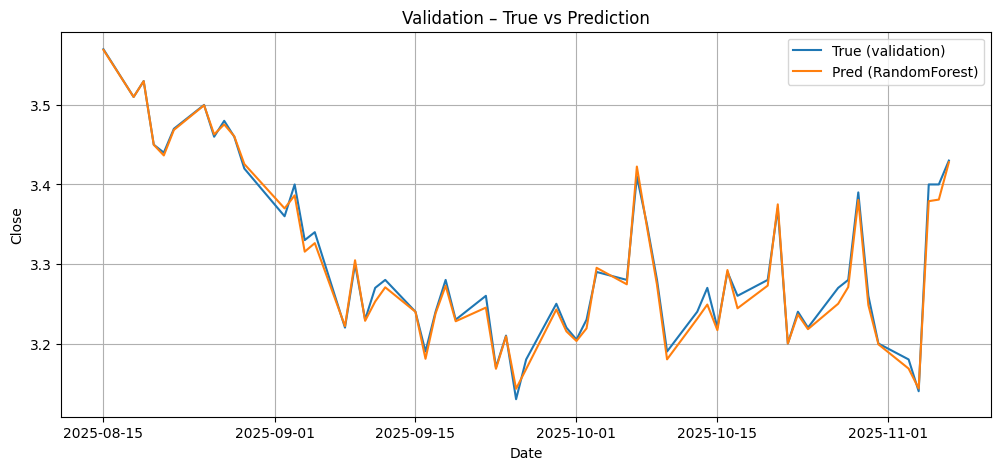

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_val.index, y_val.values, label="True (validation)")
plt.plot(y_val.index, best_pred, label=f"Pred ({best_name})")
plt.title("Validation – True vs Prediction")
plt.xlabel("Date"); plt.ylabel("Close"); plt.legend(); plt.grid(True); plt.show()


In [ ]:
# --- SETTINGS ---
HORIZON = 30  # số ngày dự báo
CLOSE = "Close"
MAX_LAG = 5

hist = work.copy()  # dữ liệu gốc có đầy đủ feature_cols
rolling_df = hist.copy()

future_preds = []
future_dates = []

def make_one_row_features(df):
    """Tạo ra 1 hàng đặc trưng mới (đã có Close hiện tại)."""
    temp = df.copy()

    # Tạo lag features
    for lag in range(1, MAX_LAG+1):
        temp[f"{CLOSE}_lag{lag}"] = temp[CLOSE].shift(lag)

    # Tạo rolling statistics
    for w in [7, 14, 30]:
        temp[f"{CLOSE}_rollmean_{w}"] = temp[CLOSE].rolling(w).mean()
        temp[f"{CLOSE}_rollstd_{w}"] = temp[CLOSE].rolling(w).std()

    # Returns
    temp["ret_1"] = temp[CLOSE].pct_change()
    temp["logret_1"] = np.log1p(temp["ret_1"])
    temp["ret_7"] = temp[CLOSE].pct_change(7)

    # Lag cho các cột khác
    for col in ["Open", "High", "Low", "Adj Close", "Volume"]:
        if col in temp.columns and col != CLOSE:
            temp[f"{col}_lag1"] = temp[col].shift(1)

    # Lấy hàng cuối làm input
    X_next = temp.iloc[[-1]][feature_cols].fillna(method="ffill").fillna(method="bfill")
    return X_next

# --- ITERATIVE FORECASTING ---
for step in range(HORIZON):
    # 1️⃣ Tạo input từ dữ liệu hiện có
    X_next = make_one_row_features(rolling_df)

    # 2️⃣ Dự đoán giá mới
    y_next = float(best_model.predict(X_next)[0])

    # 3️⃣ Tạo dòng mới cho ngày kế tiếp và append vào dataframe
    next_date = rolling_df.index[-1] + pd.Timedelta(days=1)
    new_row = rolling_df.iloc[[-1]].copy()
    new_row.index = [next_date]
    new_row[CLOSE] = y_next  # cập nhật giá dự đoán
    rolling_df = pd.concat([rolling_df, new_row])

    # 4️⃣ Lưu kết quả
    future_preds.append(y_next)
    future_dates.append(next_date)

# --- Kết quả dự báo ---
forecast_df = pd.DataFrame({
    "date": future_dates,
    "pred_Close": future_preds
})

display(forecast_df.head(), forecast_df.tail())


/tmp/ipython-input-2717160902.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_next = temp.iloc[[-1]][feature_cols].fillna(method="ffill").fillna(method="bfill")
/tmp/ipython-input-2717160902.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_next = temp.iloc[[-1]][feature_cols].fillna(method="ffill").fillna(method="bfill")
/tmp/ipython-input-2717160902.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_next = temp.iloc[[-1]][feature_cols].fillna(method="ffill").fillna(method="bfill")
/tmp/ipython-input-2717160902.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_next = temp.iloc[[-1]][feature_cols].fillna

,date,pred_Close
0,2025-11-08,3.427880
1,2025-11-09,3.427857
2,2025-11-10,3.427851
3,2025-11-11,3.427864
4,2025-11-12,3.429451


,date,pred_Close
25,2025-12-03,3.429567
26,2025-12-04,3.429567
27,2025-12-05,3.429567
28,2025-12-06,3.429567
29,2025-12-07,3.429567


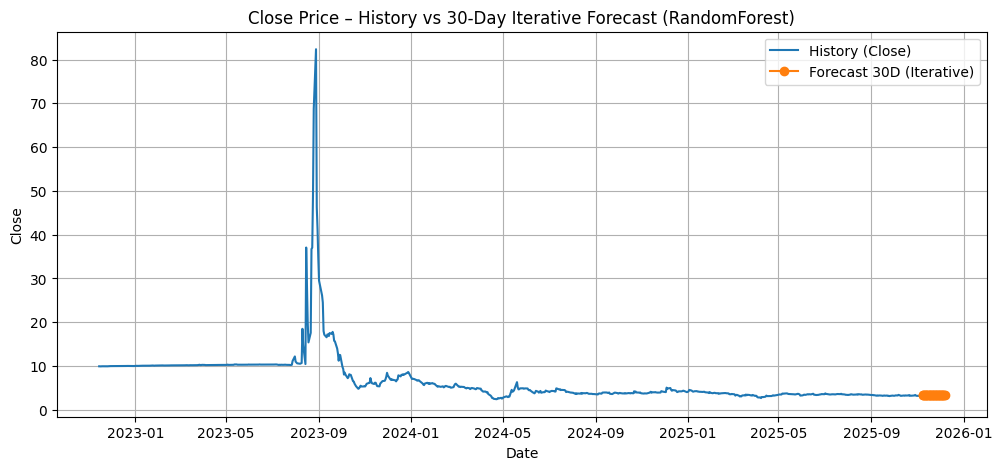

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(hist.index, hist[CLOSE], label="History (Close)")
plt.plot(forecast_df["date"], forecast_df["pred_Close"], "o-", label="Forecast 30D (Iterative)")
plt.title("Close Price – History vs 30-Day Iterative Forecast (RandomForest)")
plt.xlabel("Date"); plt.ylabel("Close"); plt.legend(); plt.grid(True)
plt.show()


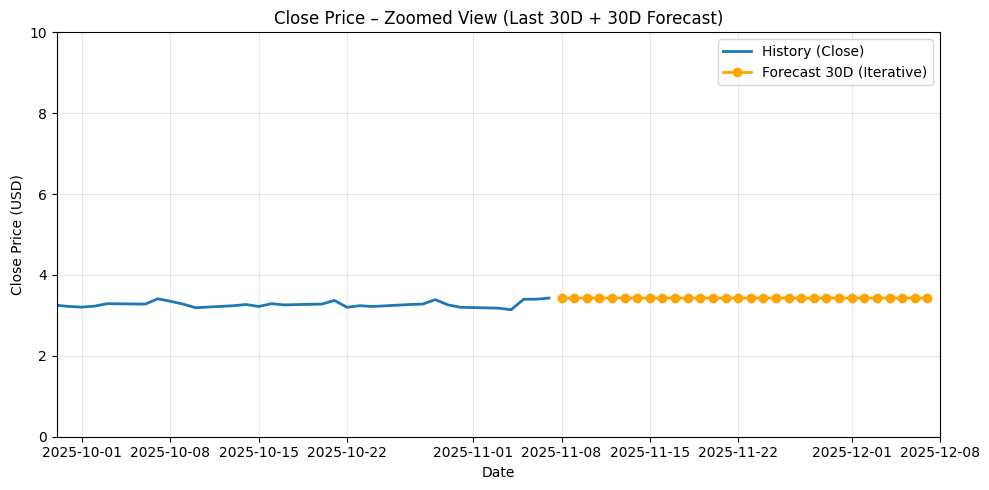

In [ ]:
import matplotlib.pyplot as plt
from datetime import timedelta

plt.figure(figsize=(10,5))

# Vẽ lịch sử 30 ngày gần nhất
plt.plot(hist.index, hist["Close"], label="History (Close)", linewidth=2)

# Vẽ dự báo 30 ngày kế tiếp (Iterative RandomForest)
plt.plot(forecast_df["date"], forecast_df["pred_Close"], "o-", color="orange",
         label="Forecast 30D (Iterative)", linewidth=2, markersize=6)

# --- Giới hạn vùng hiển thị ---
zoom_start = hist.index[-30]    # 30 ngày trước khi dự báo
zoom_end   = forecast_df["date"].iloc[-1] + timedelta(days=1)
plt.xlim(zoom_start, zoom_end)
plt.ylim(0, 10)  # 👈 Giới hạn trục Y để nhìn rõ vùng giá thực tế

# --- Trang trí ---
plt.title("Close Price – Zoomed View (Last 30D + 30D Forecast)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Lưu forecast
out_name = "VFS_close_forecast_30d.csv"
forecast_df.to_csv(out_name, index=False)

from google.colab import files
files.download(out_name)



# VFS (VinFast) – Colab Visual Analytics

This notebook loads **VFS_clean.csv** and produces a set of practical visualizations for Business Intelligence exploration:
- Price trend with moving averages (MA20, MA50)
- Trading volume timeline
- Daily returns distribution
- Rolling annualized volatility (20-day window)
- Monthly aggregated views
- Simple KPI widgets and resampling helpers

> Upload `VFS_clean.csv` to the Colab runtime (same folder as this notebook) before running.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 4)

In [ ]:
up = files.upload()

In [ ]:
# --- Load Data
path = "VFS_clean.csv"
df = pd.read_csv(path)

# Detect a date column
date_cols = [c for c in df.columns if c.lower() in ["date", "datetime", "time", "timestamp"]]
if date_cols:
    date_col = date_cols[0]
else:
    date_col = df.columns[0]  # fallback

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df = df.sort_values(by=date_col).reset_index(drop=True)

# Standard indicators if 'Close' exists
if "Close" in df.columns:
    df["MA20"] = df["Close"].rolling(20, min_periods=1).mean()
    df["MA50"] = df["Close"].rolling(50, min_periods=1).mean()
    df["Daily_Return"] = df["Close"].pct_change()
    df["RollingVol_20d"] = df["Daily_Return"].rolling(20, min_periods=1).std() * np.sqrt(252)

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Daily_Return,RollingVol_20d
0,2022-10-03,9.79,9.79,9.79,9.79,9.79,1600,9.790,9.790,NaN,NaN
1,2022-10-04,9.79,9.79,9.79,9.79,9.79,0,9.790,9.790,0.000000,NaN
2,2022-10-05,9.79,9.79,9.79,9.79,9.79,0,9.790,9.790,0.000000,0.000000
3,2022-10-06,9.79,9.79,9.79,9.79,9.79,0,9.790,9.790,0.000000,0.000000
4,2022-10-07,9.85,9.85,9.85,9.85,9.85,800,9.802,9.802,0.006129,0.048645


# 🟩 1. Biểu đồ Close Price với MA20 & MA50

**Mục đích:**
- Thể hiện xu hướng giá cổ phiếu **VinFast** theo thời gian.  
- Hai đường trung bình động (Moving Averages) giúp nhận biết xu hướng ngắn hạn (**MA20**) và trung hạn (**MA50**).

**Giải thích phân tích:**
- Khi **MA20 cắt lên MA50** → tín hiệu **xu hướng tăng (bullish)** → phản ánh kỳ vọng cao của nhà đầu tư.  
- Khi **MA20 cắt xuống MA50** → tín hiệu **xu hướng giảm (bearish)** → nhà đầu tư tạm thời mất niềm tin.

**Ứng dụng BI:**
- Phân tích thời điểm giá cổ phiếu đạt **đỉnh hoặc đáy ngắn hạn**.  
- Kết hợp với dữ liệu **Volume** để xác nhận “tín hiệu mạnh/yếu”.

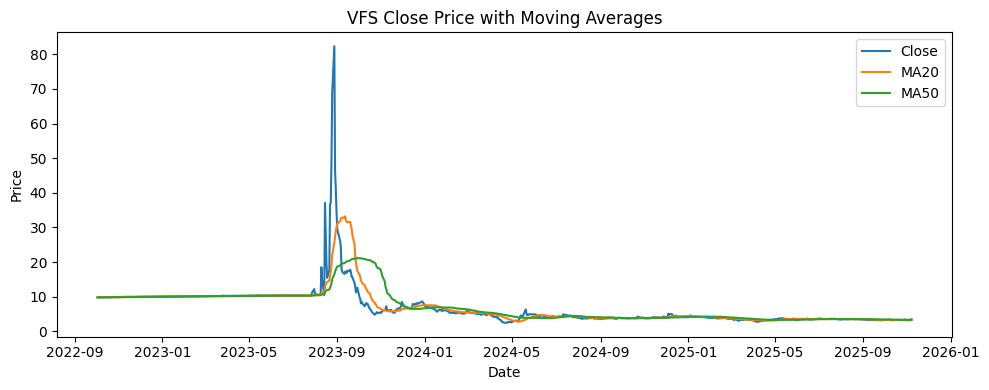

In [ ]:
# --- Close Price with Moving Averages
if "Close" in df.columns:
    plt.figure()
    plt.plot(df[date_col], df["Close"], label="Close")
    if "MA20" in df.columns: plt.plot(df[date_col], df["MA20"], label="MA20")
    if "MA50" in df.columns: plt.plot(df[date_col], df["MA50"], label="MA50")
    plt.title("VFS Close Price with Moving Averages")
    plt.xlabel("Date"); plt.ylabel("Price"); plt.legend(); plt.tight_layout()
    plt.show()
else:
    print("Column 'Close' not found.")


# 🟩 2. Biểu đồ Trading Volume theo ngày

**Mục đích:**
- Cho biết lượng cổ phiếu được **giao dịch mỗi ngày**.  
- Giúp nhận biết thời điểm thị trường **quan tâm mạnh nhất** đến cổ phiếu VinFast.

**Giải thích phân tích:**
- **Volume cao** đồng thời với **biến động giá mạnh** → có thể xuất hiện **tin tức hoặc sự kiện tài chính**.  
- **Volume thấp** trong giai đoạn giá tăng → xu hướng **có thể không bền**.

**Ứng dụng BI:**
- Xác định **mốc thời gian cần điều tra nguyên nhân** (ví dụ: báo cáo tài chính, IPO, tin đầu tư...).  
- Là yếu tố **xác thực cho xu hướng giá (price trend confirmation)**.

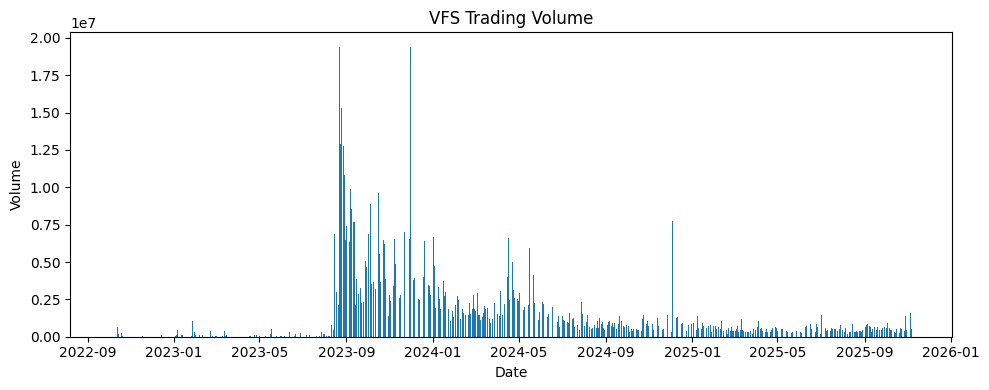

In [ ]:
# --- Trading Volume
if "Volume" in df.columns:
    plt.figure()
    plt.bar(df[date_col], df["Volume"])
    plt.title("VFS Trading Volume")
    plt.xlabel("Date"); plt.ylabel("Volume"); plt.tight_layout()
    plt.show()
else:
    print("Column 'Volume' not found.")

# 🟩 3. Histogram Daily Returns

**Mục đích:**
- Hiển thị **phân phối xác suất** của lợi suất hàng ngày (*Daily Return*).

**Giải thích phân tích:**
- Dạng **chuẩn (bell-shaped)** → biến động ổn định, rủi ro thấp.  
- **Đuôi dài về bên trái (skew âm)** → nhiều phiên giảm mạnh → rủi ro cao hơn.  
- **Đỉnh hẹp và cao** → lợi suất ít biến động → thị trường ổn định.

**Ứng dụng BI:**
- Đo **mức độ rủi ro** của cổ phiếu.  
- Có thể tính thêm **mean, median, std** để định lượng độ ổn định giá.

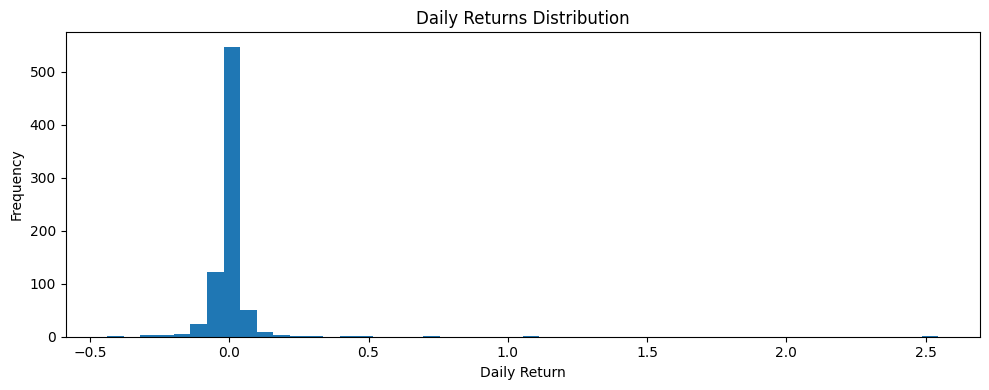

In [ ]:

# --- Daily Returns Distribution
if "Daily_Return" in df.columns:
    plt.figure()
    plt.hist(df["Daily_Return"].dropna(), bins=50)
    plt.title("Daily Returns Distribution")
    plt.xlabel("Daily Return"); plt.ylabel("Frequency"); plt.tight_layout()
    plt.show()
else:
    print("Daily_Return not available. Ensure 'Close' exists to compute it.")


# 🟩 4. Rolling Annualized Volatility (20 ngày)

**Mục đích:**
- Đo **biến động giá trung bình hàng năm** trong cửa sổ 20 ngày.  
- Theo dõi giai đoạn **thị trường bất ổn hoặc ổn định**.

**Giải thích phân tích:**
- **Volatility cao** → biến động mạnh, nhà đầu tư có thể lo ngại.  
- **Volatility thấp** → thị trường ổn định, phù hợp nhà đầu tư dài hạn.

**Ứng dụng BI:**
- Đánh giá **mức độ rủi ro theo thời gian**.  
- So sánh giữa các **quý** để nhận biết “thời kỳ biến động cao nhất”.

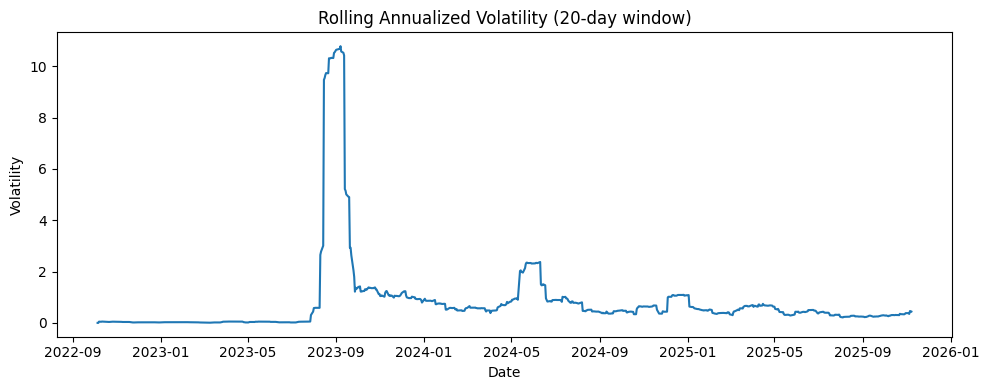

In [ ]:

# --- Rolling Annualized Volatility (20-day window)
if "RollingVol_20d" in df.columns:
    plt.figure()
    plt.plot(df[date_col], df["RollingVol_20d"])
    plt.title("Rolling Annualized Volatility (20-day window)")
    plt.xlabel("Date"); plt.ylabel("Volatility"); plt.tight_layout()
    plt.show()
else:
    print("RollingVol_20d not available. Ensure 'Close' exists to compute it.")


# 🟩 5. Monthly Returns & Monthly Volume

**Mục đích:**
- Tóm tắt dữ liệu theo **chu kỳ tháng** để dễ so sánh giữa các giai đoạn.

**Giải thích phân tích:**
- **Monthly Return dương** → tháng đó VinFast **tăng giá**.  
- **Monthly Volume cao** → thị trường giao dịch mạnh, có thể liên quan **tin tức tích cực hoặc tiêu cực**.

**Ứng dụng BI:**
- Tạo **dashboard theo tháng/quý**.  
- Giúp ban lãnh đạo xác định **chu kỳ thị trường hoặc tác động mùa vụ (seasonal patterns)**.

/tmp/ipython-input-2970024238.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_m["Close"].resample("M").last()


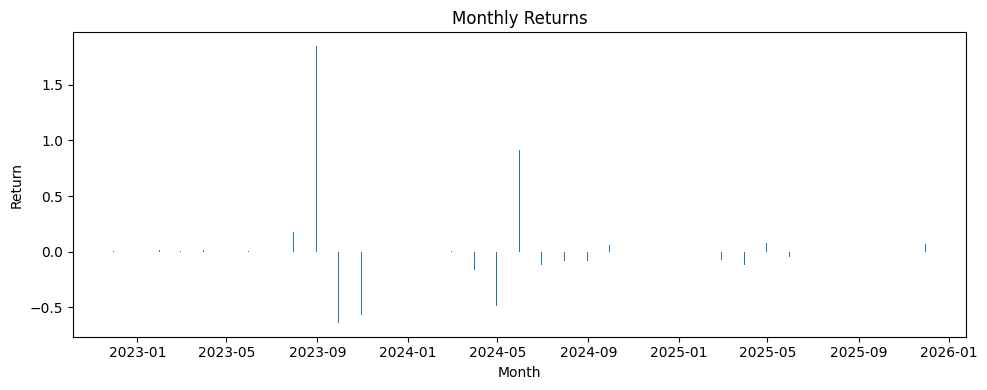

/tmp/ipython-input-2970024238.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_vol = df_m["Volume"].resample("M").sum()


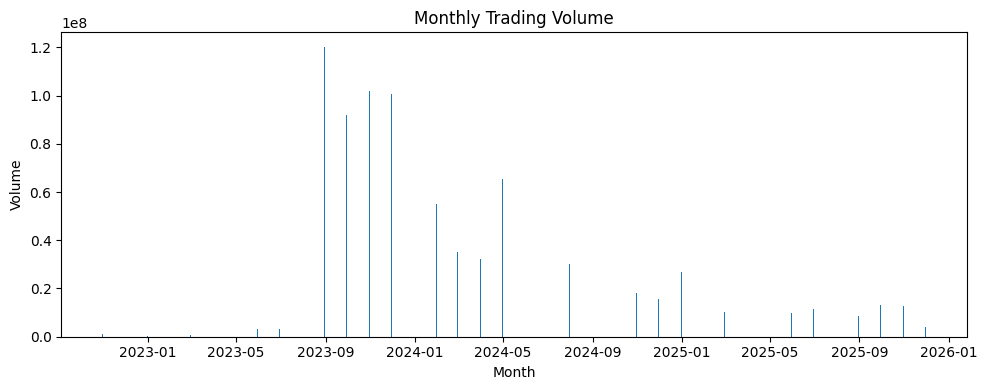

In [ ]:

# --- Monthly Aggregations
df_m = df.set_index(date_col).copy()
if "Close" in df_m.columns:
    monthly_close = df_m["Close"].resample("M").last()
    monthly_return = monthly_close.pct_change()
    plt.figure()
    plt.bar(monthly_return.index, monthly_return.values)
    plt.title("Monthly Returns")
    plt.xlabel("Month"); plt.ylabel("Return"); plt.tight_layout()
    plt.show()

if "Volume" in df_m.columns:
    monthly_vol = df_m["Volume"].resample("M").sum()
    plt.figure()
    plt.bar(monthly_vol.index, monthly_vol.values)
    plt.title("Monthly Trading Volume")
    plt.xlabel("Month"); plt.ylabel("Volume"); plt.tight_layout()
    plt.show()


# 🟩 6. KPI nhanh

**Các chỉ số hiển thị:**
- **Last Close:** giá đóng cửa mới nhất.  
- **Total Return:** tỷ suất tăng/giảm từ đầu kỳ đến cuối kỳ.  
- **Mean Daily Return:** lợi suất trung bình hàng ngày.  
- **Std Daily Return:** độ lệch chuẩn (rủi ro biến động hàng ngày).

**Ứng dụng BI:**
- Các chỉ tiêu tóm tắt **hiệu quả đầu tư** trong giai đoạn phân tích.  
- Dễ chèn vào **dashboard Tableau/Power BI** hoặc phần **summary trong báo cáo**.


In [ ]:
def kpi(name, value):
    print(f"{name}: {value}")

if "Close" in df.columns:
    last_close = df["Close"].dropna().iloc[-1]
    first_close = df["Close"].dropna().iloc[0]
    total_ret = (last_close / first_close - 1) if first_close != 0 else np.nan

    kpi("Last Close", round(last_close, 4))
    kpi("Total Return (from first to last)", f"{total_ret:.2%}")

    if "Daily_Return" in df.columns:
        kpi("Mean Daily Return", f"{df['Daily_Return'].mean():.4%}")
        kpi("Std Daily Return", f"{df['Daily_Return'].std():.4%}")


Last Close: 3.43
Total Return (from first to last): -64.96%
Mean Daily Return: 0.2577%
Std Daily Return: 11.6920%


# 🟩 7. Resample Plot (Tuần / Tháng)

**Mục đích:**
- Cho phép nhóm dữ liệu linh hoạt theo chu kỳ (**Weekly**, **Monthly**...).  
- Có thể chọn biểu đồ **line** hoặc **bar** để biểu diễn **giá trị trung bình, tổng hoặc cuối kỳ**.

**Ứng dụng BI:**
- So sánh giữa các giai đoạn **ổn định hoặc bất ổn**.

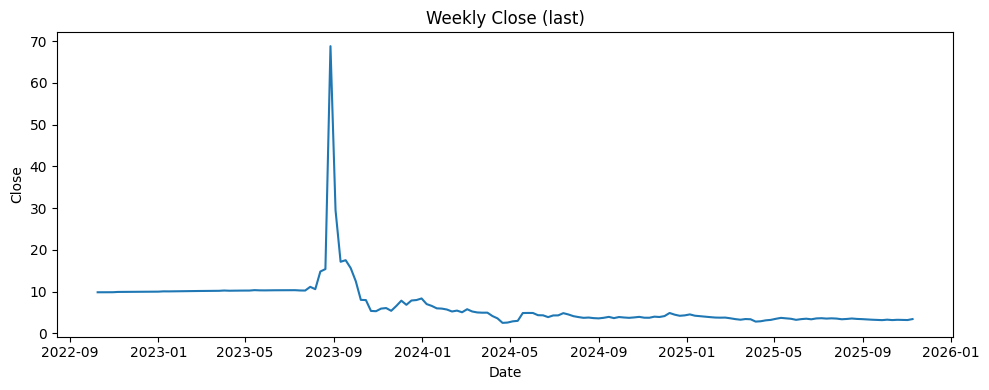

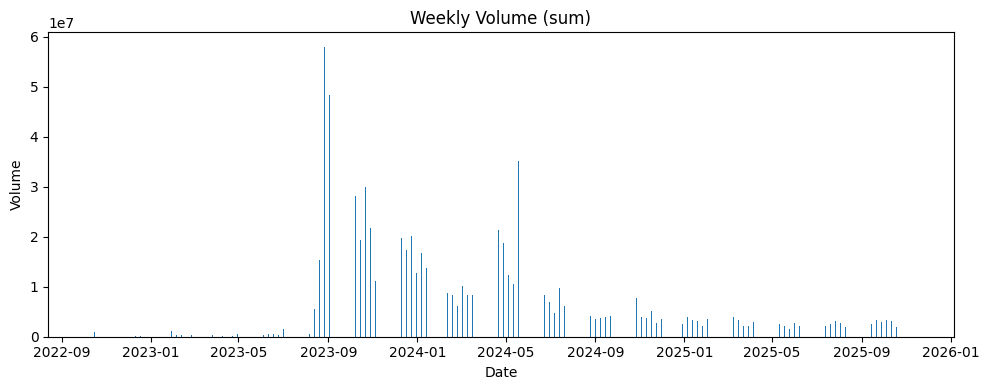

In [ ]:
def resample_plot(df, date_col, column, rule="W", how="mean", kind="line", title=None):
    tmp = df.set_index(date_col)
    if how == "mean":
        ser = tmp[column].resample(rule).mean()
    elif how == "sum":
        ser = tmp[column].resample(rule).sum()
    elif how == "last":
        ser = tmp[column].resample(rule).last()
    else:
        raise ValueError("Unsupported 'how'. Use mean|sum|last.")

    if kind == "line":
        plt.figure()
        plt.plot(ser.index, ser.values)
    elif kind == "bar":
        plt.figure()
        plt.bar(ser.index, ser.values)
    else:
        raise ValueError("Unsupported 'kind'. Use line|bar.")

    plt.title(title or f"{column} ({how} by {rule})")
    plt.xlabel("Date"); plt.ylabel(column); plt.tight_layout()
    plt.show()

# Ví dụ:
if "Close" in df.columns:
    resample_plot(df, date_col, "Close", rule="W", how="last", kind="line", title="Weekly Close (last)")
if "Volume" in df.columns:
    resample_plot(df, date_col, "Volume", rule="W", how="sum", kind="bar", title="Weekly Volume (sum)")


## Link Google Colab: https://colab.research.google.com/drive/1fqa9BYKx1z2j5HA4yGDBEht8dipRsBlI?usp=sharing